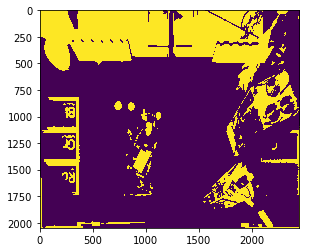

In [8]:
from skimage import data, io, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt

import skimage
import cv2

REDIUM_COLOR = [230, 0, 0]
GREENIUM_COLOR = [77, 255, 25]
BLUEIUM_COLOR = [25, 153, 255]

def get_distances_skimage(input_img, kl=2, kp=1, **kwargs):
    lab_COLORS = skimage.color.rgb2lab(COLORS[np.newaxis, :, :])[0]
    lab_img = skimage.color.rgb2lab(input_img)
    dist_array = skimage.color.deltaE_cmc(lab_img[:, :, np.newaxis], lab_COLORS[np.newaxis, np.newaxis, :],
                                          kl, kp)
    return dist_array

def determ_color(color, s_cutoff=0.25, v_cutoff=0.25, s_gain=20, v_gain=20, **kwargs):
    img2 = np.array([[color.astype(np.uint8)]])
    img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
    img2[:, :, 1] = skimage.exposure.adjust_sigmoid(img2[:, :, 1], s_cutoff, s_gain)
    img2[:, :, 2] = skimage.exposure.adjust_sigmoid(img2[:, :, 2], v_cutoff, v_gain)
    img2 = cv2.cvtColor(img2, cv2.COLOR_HSV2RGB)
    return np.argmin(get_distances_skimage(np.array(img2))[0, 0])



img = io.imread("/home/nuka-cola/.ros/image.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_f = cv2.drawContours(image, contours, -1, (255,0,0), 3)

plt.imshow(image_f)



[[230   0   0]
 [ 77 255  25]
 [ 25 153 255]]
[[[ 48.04335752  74.08054268  62.1584816 ]
  [ 88.52609404 -79.01588508  81.76924998]
  [ 61.83055688   4.32627342 -59.4598142 ]]]
(array([ 48.04335752,  74.08054268,  62.1584816 ]), array([ 88.52609404, -79.01588508,  81.76924998]), array([ 61.83055688,   4.32627342, -59.4598142 ]))
[[897   4]]


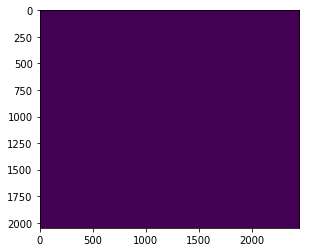

In [75]:
import numpy as np

COLORS = np.array((REDIUM_COLOR,GREENIUM_COLOR,BLUEIUM_COLOR), dtype=np.uint8)


print (COLORS)


LAB_COLORS = skimage.color.rgb2lab(COLORS[np.newaxis,:,:])
print (LAB_COLORS)
LAB_REDIUM = LAB_COLORS[0,0]
LAB_GREENIUM = LAB_COLORS[0,1]
LAB_BLUEIUM = LAB_COLORS[0,2]

print (LAB_REDIUM,LAB_GREENIUM,LAB_BLUEIUM)

for cnt in contours:
    mask = np.zeros(img_gray.shape,np.uint8)
    cv2.drawContours(mask,[cnt],0,255,-1)
    #pixelpoints = np.transpose(np.nonzero(mask))
    pixelpoints = cv2.findNonZero(mask) 

print pixelpoints[0]
plt.imshow(mask)
# skimage.color.deltaE_cie76(contours[0], LAB_BLUEIUM)

In [76]:
def find_color_difference(color):
    print color.shape
    distances = []
    distances.append(skimage.color.deltaE_cmc(color, LAB_REDIUM,2,1))
    distances.append(skimage.color.deltaE_cmc(color, LAB_GREENIUM,2,1))
    distances.append(skimage.color.deltaE_cmc(color, LAB_BLUEIUM,2,1))
    return distances

In [77]:
a = (pixelpoints[0,0,0],pixelpoints[0,0,1])

print (pixelpoints[0,0,0],pixelpoints[0,0,1])
print pixelpoints[0,0]
print img[a]

for pixel in pixelpoints:
        
    
    find_color_difference(img[a])

(897, 4)
[897   4]
[33 41 56]
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)
(3,)


In [78]:
COLORS = np.array([[0, 123, 176], [208, 90, 40], [28, 28, 32], [96, 153, 59], [247, 181, 0]], dtype=np.uint8)
LAB_COLORS = COLORS[np.newaxis, :, :]
print LAB_COLORS

[[[  0 123 176]
  [208  90  40]
  [ 28  28  32]
  [ 96 153  59]
  [247 181   0]]]


In [9]:
avg_r = 0
avg_g = 0
avg_b = 0
for pixel in pixelpoints:
    # np.sum
    avg_r += img[pixelpoints[0,0,0]][0,0]
    avg_g += img[pixelpoints[0,0,0]][0,1]
    avg_b += img[pixelpoints[0,0,0]][0,2]
    #print img[pixel[0]]
avg_r = avg_r/len(pixelpoints)
avg_g = avg_g/len(pixelpoints)
avg_b = avg_b/len(pixelpoints)

color = np.zeros((1,1,3),dtype=np.uint8)

color[0,0,0] = avg_r
color[0,0,1] = avg_g
color[0,0,2] = avg_b

COLOR = skimage.color.rgb2lab(color)
print COLOR
mas = find_color_difference(COLOR[0, 0])
print mas

[[[ 28.34984403   2.27268067 -17.08110991]]]
(3,)
[96.45647072803467, 119.9409620227277, 35.13774503940121]


In [11]:
skimage.color.deltaE_cmc(COLOR, [LAB_REDIUM, LAB_GREENIUM, LAB_BLUEIUM],2,1)






array([[ 96.45647073, 119.94096202,  35.13774504]])